In [5]:
######################
#import useful modules
######################

import sys

sys.path.append("/home2/datahome/jgula/Python_Modules_p3/")

from Modules import *
from Modules_gula import *

from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors

########

%matplotlib inline



no basemap module installed


## Find out location of Osmosis mooring

In [6]:
#########
# Osmosis 49.0°N 016.5°W
####

def find_nearest(x,y,lon, lat):
    dist = (x-lon)**2 + (y-lat)**2
    return np.unravel_index(dist.argmin(),dist.shape)

####
# Pick the central mooring

lat_mooring = 48.6290
lon_mooring = -16.0990

####
# Load full simulation to locate closest grid point

simul =  load(simul = 'polgyr', output=False)
latx,laty = find_nearest(simul.x,simul.y,lon_mooring, lat_mooring)

####
# check that it matches original coordinates

print(simul.x[latx,laty], simul.y[latx,laty])



-16.088721257769187 48.62127744312968


## Load a small region around Osmosis

In [7]:
time = 1000

#########
# domain corners (in grid points)

ix1=latx-250; ix2=latx+120
iy1=laty-250; iy2=laty+120

#############################################
# Load simulation again (but only the zoom)

simul =  load(simul = 'polgyr' + ' [' + format(np.max([0,iy1])) + ',' + format(iy2)\
                               +  ',' + format(ix1) + ',' + format(ix2) +',[1,300,1]] ' + format(time), output=False)

#############################################
# Change lat/lon to km

simul.x = np.cumsum(1/simul.pm,axis=0)/1000.
simul.y = np.cumsum(1/simul.pn,axis=1)/1000.
simul.x -=  simul.x[0,0]
simul.y -=  simul.y[0,0]

#############################################
# select a few depths

depths = [-400,-300,-200,-100]
label_depths = ['z=' +format(depth)+' m' for depth in depths]



## Compute a few variables at different depths

In [12]:


print('vrt')
vrt = tools.nanbnd( (tools.psi2rho(var('vrt',simul,depths=depths).data).T/simul.f.T ).T ,1)

print('strain')
strain = tools.nanbnd(( var('str',simul,depths=depths).data.T / simul.f.T ).T ,1)

print('div')
div = tools.nanbnd(( var('div',simul,depths=depths).data.T / simul.f.T ).T  ,1)

print('ow')
ow = tools.nanbnd(( var('ow',simul,depths=depths).data.T / simul.f.T**2 ).T  ,1)

###############################


vrt
strain
div
ow


## Make some plots

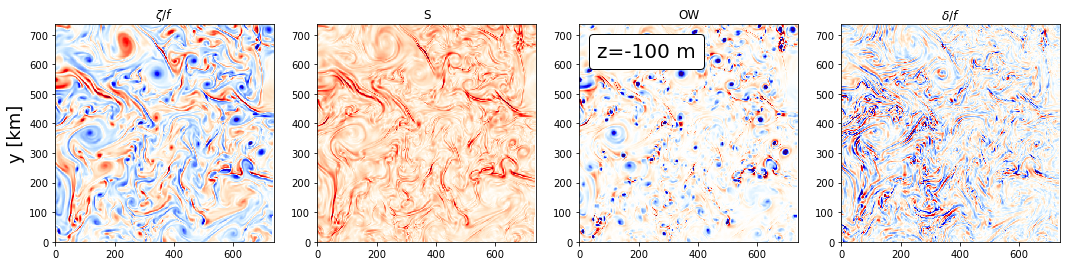

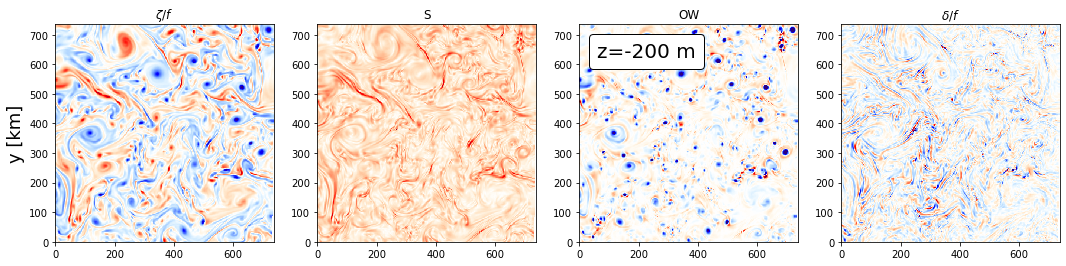

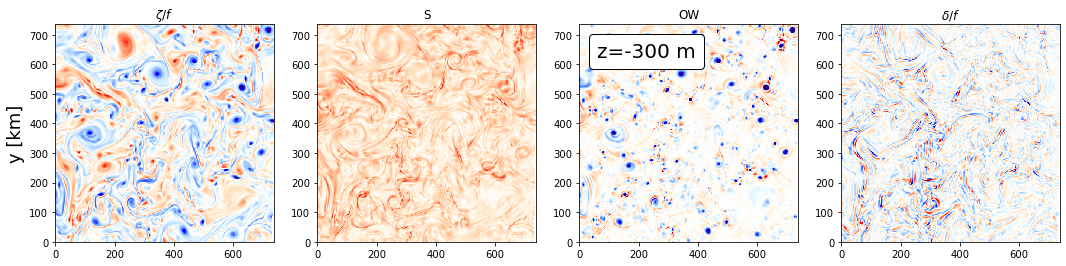

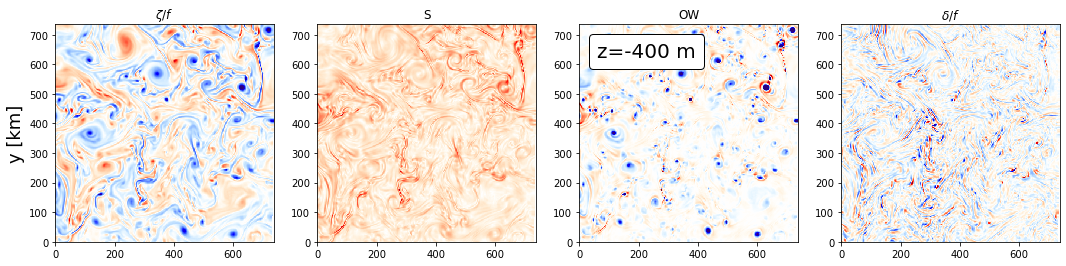

In [15]:
plt.close()

##################################################

my_cmap=plot.ncview_colormap('blu_red')

levels = np.arange(-1.,1.01,0.01)*0.5   
levelsow = np.arange(-1.,1.01,0.01)*1e-1


###############################

for idepth in range(len(depths))[::-1]:
    
    
    fig = plt.figure(figsize=(18.0,4.0))

    ###############################

    ax1 = plt.subplot(1,4,1);
    CS1 = plt.pcolormesh(simul.x.T,simul.y.T,ma.masked_invalid(vrt[:,:,idepth].T),\
                         vmin=min(levels), vmax=max(levels),cmap=my_cmap,rasterized=True);
    plt.ylabel(r'y [km]',fontsize=18) #plt.xlabel(r'${\rm km}$');
    plt.title(r'$\zeta/f$')

    ###############################
    ax1 = plt.subplot(1,4,2);
    CS1 = plt.pcolormesh(simul.x.T,simul.y.T,ma.masked_invalid(strain[:,:,idepth].T),\
                         vmin=min(levels), vmax=max(levels),cmap=my_cmap,rasterized=True);
    #plt.ylabel(r'y [km]',fontsize=18) #plt.xlabel(r'${\rm km}$');
    plt.title(r'S')
    
    ###############################
    ax1 = plt.subplot(1,4,3);
    CS1 = plt.pcolormesh(simul.x.T,simul.y.T,ma.masked_invalid(ow[:,:,idepth].T),\
                         vmin=min(levelsow), vmax=max(levelsow),cmap=my_cmap,rasterized=True);
    #plt.ylabel(r'y [km]',fontsize=18) #plt.xlabel(r'${\rm km}$');
    plt.title(r'OW')
    
    # add label
    at = AnchoredText(label_depths[idepth],loc=2, prop=dict(size=20), frameon=True, )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2"); ax1.add_artist(at)

    ###############################
    ax1 = plt.subplot(1,4,4);
    CS1 = plt.pcolormesh(simul.x.T,simul.y.T,ma.masked_invalid(div[:,:,idepth].T),vmin=min(levels*0.1), vmax=max(levels*0.1),cmap=my_cmap,rasterized=True);
    #plt.ylabel(r'y [km]',fontsize=18) #plt.xlabel(r'${\rm km}$');
    plt.title(r'$\delta/f$')
    
    
    